In [ ]:
from wordcloud import WordCloud
import ujson as json

text =  open("news.json", "r", encoding="UTF-8").read()

In [27]:
import re
def clean(texts):
    cleaned_texts = []
    remove_keywords = ['null', 'license', 'comments', 'id', 'co kr', 'tt']

    for text in texts:
        text = re.sub(r'<[^>]+>','',text) #html 태그 삭제
        text = re.sub(r'(http|https|ftp)"//(?:[-\w.]|(?:%[\da-fA-F]{2}))+','',text) #url 삭제
        text = re.sub(r"([a=zA=Z0=9_.+-]+@[a-zA-Z0-9]+\.[a-zA-Z0-9-.]+)",'',text) # 이메일 삭제
        text = re.sub(r'\s+', '', text) #공백삭제
        text = re.sub('([ㄱ-ㅎ ㅏ-ㅣ]+)', '',text) #자음 모음만 있는경우 삭제
        text = re.sub('[^\w\s]', '', text) # 특수기호 삭제

        for keyword in remove_keywords:
            text = re.sub(fr'\b{re.escape(keyword)}\b', '', text, flags=re.IGNORECASE)

        text = re.sub(r'\s+', ' ', text).strip()
        
        cleaned_texts.append(text)
    return cleaned_texts


<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\w'
C:\Users\ddongjun\AppData\Local\Temp\ipykernel_19948\1696331961.py:12: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('[^\w\s]', '', text) # 특수기호 삭제


In [ ]:
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로 설정 (예: 맑은 고딕)
    width=800,
    height=400,
    background_color="white"
).generate(text)
wordcloud.words_

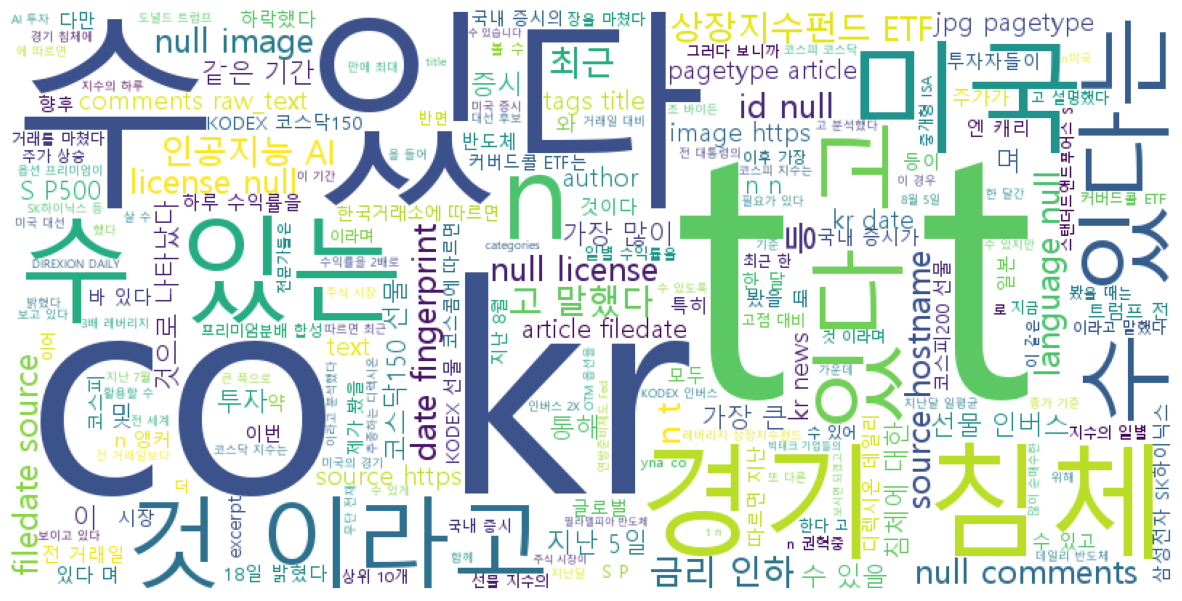

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = ((15,10)))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()